In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('man-of-the-match-fifa-2018')
jovian.set_colab_id('1Ax5apIdVzE2o4AXvubneCZjDtBXpRALh')

# **Predict Man of the Match FIFA 2018** 

**About the Project:** The _**objective**_ of this project is to apply the knowledge and skills, acquired during the _Global Certificate of Data Science and AI (GCDAI)_ program provided by _INSAID_, to a real world scenario. Following _**skills**_ were demonstrated:
- Data Cleaning
- Exploratory Data Analysis
- Feature Engineering
- Machine Learning

**About Me:**  
_(10th February, 2021)_

## **Problem Statement**

> - Football Federation organizes world cup every four years and they collect statistics report about different playing countries and their players.
>
> - They always spend a lot of time going through the statistics report manually to find the player with the best performance and reward him with the title of man of the match.
>
> - Recent they have released this stat to the public and one of football fanatic company called DreamFootball has taken up the challenge of predicting the outcome before they announce the title of man of the match.
>
> - They have hired a group of data scientist to do this task, consider you as one of them.
>
> - **Predict which team member will win Man of the Match award based on the given statistics of FIFA 2018.**

In [ ]:
# Import required libraries

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')



## **Data Acquisition and Description**

### **Data Acquisition**

In [ ]:
# Data acquisition

dataset_url = 'https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/FIFA%202018%20Statistics.csv'
data_df = pd.read_csv(dataset_url)
data_df.sample(5)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
45,21-06-2018,Croatia,Argentina,3,42,15,5,6,4,2,3,18,3,80,372,104,23,4,0,0,Yes,53.0,Group Stage,No,0,NaN,NaN
51,22-06-2018,Switzerland,Serbia,2,58,20,5,8,7,7,3,17,2,87,547,112,12,1,0,0,Yes,52.0,Group Stage,No,0,NaN,NaN
89,28-06-2018,Poland,Japan,1,46,11,2,5,4,7,0,12,3,83,462,80,8,0,0,0,Yes,59.0,Group Stage,No,0,NaN,NaN
67,25-06-2018,Egypt,Saudi Arabia,1,39,8,1,6,1,2,3,8,5,82,357,106,16,2,0,0,Yes,22.0,Group Stage,No,0,NaN,NaN
13,16-06-2018,Denmark,Peru,1,48,10,3,5,2,7,3,15,6,82,342,110,18,2,0,0,Yes,59.0,Group Stage,No,0,NaN,NaN


### **Dataset Description**

|Column |	Description|
|----|----|
Date	|match Date
Team	|Playing Team
Opponent	|Opponent Team
Goal Scored	|Number of goals scored by this team
Ball Possession	% |Amount of time ball was in control by the team
Attempts	|Number of attempts to score goal
On-Target |Number of shots on-target
Off-Target  |Number of shots that went off-target
Blocked	|Number of attempts blocked by the opponent's team
Corners	|Number of corner shots used
Offsides	|Number of off-side events
Free Kicks	|Number of free-kicks used
Saves |Number	of saves by the goal keeper
Pass Accuracy	% |Percentage of passes that reached the same team player as aimed
Passes	|Total number of passes by the team
Distance Covered (Kms)	|Total distance covered by the team members in this game
Fouls Committed	|Number of fouls committed by the team members
Yellow Card	|Number of Yellow warning received
Yellow & Red	|Number of Yellow & Red warning received
Red	|Number of Red cards received
Man of the Match	|Did this team member win Man of the Match?
1st Goal	|When did the team score the 1st goal?
Round	|Stage of the match
PSO	|Was there a penalty shootout (PSO) in this match?
Goals in PSO	|Number of goals scored in the Penalty shootout
Own goals	|Number of own goals
Own goal Time	|When did the team score own goal?

## **EDA for ML**


### **Data Pre-Processing**


In [ ]:
# Size of the dataset

data_df.shape

(128, 27)

In [ ]:
# Data Information

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

In [ ]:
# Data Description

data_df.describe()
#data_df.describe(include='all')

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,82.554688,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,5.933766,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,67.000000,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,79.000000,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,83.000000,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,87.000000,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,94.000000,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


- The dataset seems to be accurate, free from outliers.
- It contains some `NaN` values, inplace where the team didn't score.


### **Data Cleaning**
- Convert the `'Date'`column from `object` dtype to `datetime64[ns]`.
- Drop unwanted & corelated columns `['Date', 'Team', 'Opponent', 'Ball Possession %', 'Round', 'Offsides', 'Passes', 'Saves', 'Distance Covered (Kms)', 'Yellow Card', 'Yellow & Red', 'Red', 'PSO', 'Goals in PSO', 'Own goal Time', '1st Goal', 'Own goals']`.
- In column `data_df['Man of the Match']`, replace `Yes` & `No` with `1` & `0` respectively.


In [ ]:
# Convert object type to datetime

data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df.Date.dtype

dtype('<M8[ns]')

In [ ]:
# Drop unwanted columns ['Date', 'Team', 'Opponent', 'Ball Possession %', 'Round', 'Offsides', 'Passes', 'Saves', 'Distance Covered (Kms)', 'Yellow Card', 'Yellow & Red', 'Red', 'PSO', 'Goals in PSO', 'Own goal Time', '1st Goal', 'Own goals']

training_features = data_df.drop(['Date', 'Team', 'Opponent', 'Ball Possession %', 'Round', 'Offsides', 'Passes', 'Saves', 'Distance Covered (Kms)', 'Yellow Card', 'Yellow & Red', 'Red', 'PSO', 'Goals in PSO', 'Own goal Time', '1st Goal', 'Own goals'], axis = 1) 
training_features.head(2)

,Goal Scored,Attempts,On-Target,Off-Target,Blocked,Corners,Free Kicks,Pass Accuracy %,Fouls Committed,Man of the Match
0,5,13,7,3,3,6,11,78,22,Yes
1,0,6,0,3,3,2,25,86,10,No


In [ ]:
# In column data_df['Man of the Match'], replace Yes & No with 1 & 0 respectively.

training_features['Man of the Match'].replace(['Yes', 'No'], [1, 0], inplace=True)
training_features.head(2)

,Goal Scored,Attempts,On-Target,Off-Target,Blocked,Corners,Free Kicks,Pass Accuracy %,Fouls Committed,Man of the Match
0,5,13,7,3,3,6,11,78,22,1
1,0,6,0,3,3,2,25,86,10,0


### **Feature Engineering**

- **_Efficient Attempts_** calculates the efficiency of attempts attempted by the team.   
`Attempts =  On-Target + Off-Target + Blocked`  
`Efficient Attempts = On-Target / Attempts`
- **_Fouls Advantage_** caculates the advantage of team over opponent's team in terms of fouls committed.   
`Fouls Advantage = Free Kicks - Fouls Committed`


In [ ]:
# Efficient Attempts = On-Target / Attempts

training_features['Efficient Attempts'] = round((training_features['On-Target'] / training_features['Attempts'] * 100), 1)
training_features.head(2)

,Goal Scored,Attempts,On-Target,Off-Target,Blocked,Corners,Free Kicks,Pass Accuracy %,Fouls Committed,Man of the Match,Efficient Attempts
0,5,13,7,3,3,6,11,78,22,1,53.8
1,0,6,0,3,3,2,25,86,10,0,0.0


In [ ]:
# Fouls Advantage = Free Kicks - Fouls Committed

training_features['Fouls Advantage'] = training_features['Free Kicks']  - training_features['Fouls Committed']
training_features.head(2)

,Goal Scored,Attempts,On-Target,Off-Target,Blocked,Corners,Free Kicks,Pass Accuracy %,Fouls Committed,Man of the Match,Efficient Attempts,Fouls Advantage
0,5,13,7,3,3,6,11,78,22,1,53.8,-11
1,0,6,0,3,3,2,25,86,10,0,0.0,15


In [ ]:
# Delete unwanted columns after feature engineering

training_features.drop(['On-Target', 'Off-Target', 'Blocked', 'Attempts', 'Free Kicks', 'Fouls Committed'], axis = 1, inplace=True) 
training_features.head(2)

,Goal Scored,Corners,Pass Accuracy %,Man of the Match,Efficient Attempts,Fouls Advantage
0,5,6,78,1,53.8,-11
1,0,2,86,0,0.0,15


### **Data Post-Processing**

In [ ]:
# Size of the dataset

training_features.shape

(128, 6)

In [ ]:
# Data Information

training_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Goal Scored         128 non-null    int64  
 1   Corners             128 non-null    int64  
 2   Pass Accuracy %     128 non-null    int64  
 3   Man of the Match    128 non-null    int64  
 4   Efficient Attempts  128 non-null    float64
 5   Fouls Advantage     128 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 6.1 KB


In [ ]:
# Data Description

training_features.describe()
#training_features.describe(include='all')

,Goal Scored,Corners,Pass Accuracy %,Man of the Match,Efficient Attempts,Fouls Advantage
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.320312,4.718750,82.554688,0.500000,31.185938,1.343750
std,1.156519,2.446072,5.933766,0.501965,13.977404,6.336294
min,0.000000,0.000000,67.000000,0.000000,0.000000,-17.000000
25%,0.000000,3.000000,79.000000,0.000000,23.100000,-3.000000
50%,1.000000,5.000000,83.000000,0.500000,31.800000,2.000000
75%,2.000000,6.000000,87.000000,1.000000,38.500000,5.000000
max,6.000000,11.000000,94.000000,1.000000,75.000000,17.000000


### **Data Visualization**

In [ ]:
# Visualizing correlation between features using pairplot

#sns.pairplot(training_features, size=2);

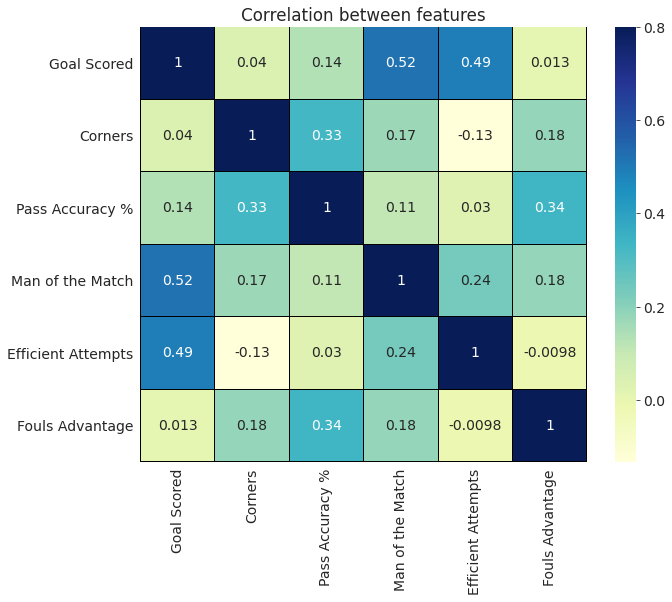

In [ ]:
# Visualizing correlation between features using heatmap

corr = training_features.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=False, annot=True, cmap='YlGnBu', linecolor='Black')
plt.title('Correlation between features');

## **Machine Learning**


### **Prepare Data for ML**
- Scale the numeric features with `StandardScaler`.
- OHE columns `[]`.
- Check target variable distribution.

In [ ]:
# Identifying feature names

numeric_feature_names = ['Goal Scored', 'Corners', 'Pass Accuracy %', 'Efficient Attempts', 'Fouls Advantage']
categorical_feature_names = []

In [ ]:
# Scaling/Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(training_features[numeric_feature_names])
training_features[numeric_feature_names] = scaler.transform(training_features[numeric_feature_names])
training_features.head()

,Goal Scored,Corners,Pass Accuracy %,Man of the Match,Efficient Attempts,Fouls Advantage
0,3.194193,0.525857,-0.770604,1,1.624259,-1.955757
1,-1.146112,-1.115843,0.582910,0,-2.239935,2.163711
2,-1.146112,-1.936693,-0.770604,0,0.453509,-1.005111
3,-0.278051,0.115432,0.582910,1,-0.185735,0.896182
4,-1.146112,0.115432,0.582910,0,-0.580774,-1.480434


In [ ]:
# OHE

#training_features = pd.get_dummies(training_features, columns=categorical_feature_names, drop_first=True)
#training_features.head(2)

In [ ]:
# Check target variable distribution

training_features['Man of the Match'].value_counts()

### **Splitting Data**

- Split `training_features` into `X` and `y` and further to train and test datasets.
- `test_size = 0.2`
- `random_state = 63`

In [ ]:
# Split training features into X & y using pandas)

X = training_features.loc[:, training_features.columns != 'Man of the Match']
y = training_features['Man of the Match']
X.head(2)

,Goal Scored,Corners,Pass Accuracy %,Efficient Attempts,Fouls Advantage
0,3.194193,0.525857,-0.770604,1.624259,-1.955757
1,-1.146112,-1.115843,0.582910,-2.239935,2.163711


In [ ]:
# Split X & y for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=0)
print('Train dataset shape: {} {}'.format(X_train.shape, y_train.shape))
print('Test dataset shape: {} {}'.format(X_test.shape, y_test.shape))

Train dataset shape: (102, 5) (102,)
Test dataset shape: (26, 5) (26,)


### **Define Model**

In [ ]:
# Model selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [ ]:
model_1 = LogisticRegression(random_state=0)
model_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model_2 = DecisionTreeClassifier(random_state=0)
model_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
model_3 = RandomForestClassifier(random_state=0)
model_3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### **Model Prediction**


In [ ]:
# Model prediction on test dataset (X_test)

y_pred_model_1 = model_1.predict(X_test)
y_pred_model_2 = model_2.predict(X_test)
y_pred_model_3 = model_3.predict(X_test)

### **Model Evaluation**

In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

models = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

def model_evaluation_score(y_actual, y_preds, model_name):
    models.append(model_name)
    print('Accuracy  : ', accuracy_score(y_actual, y_preds))
    accuracy_scores.append(accuracy_score(y_actual, y_preds))
    print('Precision : ', precision_score(y_actual, y_preds))
    precision_scores.append(precision_score(y_actual, y_preds))
    print('Recall    : ', recall_score(y_actual, y_preds))
    recall_scores.append(recall_score(y_actual, y_preds))
    print('f1 score : ', f1_score(y_actual, y_preds))
    f1_scores.append(f1_score(y_actual, y_preds))
    
def display_confusion_matrix(y_actual, y_preds):
    Confusion_Matrix = pd.DataFrame(confusion_matrix(y_actual, y_preds))
    Confusion_Matrix.index = ['Actual False', 'Actual True']
    Confusion_Matrix.columns = ['Predicted False', 'Predicted True']
    print(Confusion_Matrix)


In [ ]:
print('Logistic Regression:')
model_evaluation_score(y_test, y_pred_model_1, 'Logistic Regression')

Logistic Regression:
Accuracy  :  0.6538461538461539
Precision :  0.7142857142857143
Recall    :  0.6666666666666666
f1 score :  0.689655172413793


In [ ]:
print('Decision Tree:')
model_evaluation_score(y_test, y_pred_model_2, 'Decision Tree')

Decision Tree:
Accuracy  :  0.6923076923076923
Precision :  0.7058823529411765
Recall    :  0.8
f1 score :  0.7500000000000001


In [ ]:
print('Random Forest:')
model_evaluation_score(y_test, y_pred_model_3, 'Random Forest')

Random Forest:
Accuracy  :  0.6538461538461539
Precision :  0.6666666666666666
Recall    :  0.8
f1 score :  0.7272727272727272


In [ ]:
# Model evaluation scores with pandas dataframe

model_evaluation_data = {
    'Model' : models,
    'Accuracy' : accuracy_scores,
    'Precision' : precision_scores,
    'Recall' : recall_scores,
    'F1 score' : f1_scores
}

model_evaluation_df = pd.DataFrame(model_evaluation_data) 

model_evaluation_df

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.653846,0.714286,0.666667,0.689655
1,Decision Tree,0.692308,0.705882,0.800000,0.750000
2,Random Forest,0.653846,0.666667,0.800000,0.727273


## **Finalize Model**

After experimenting with the classification models, for Fifa 2018 to predict the Man of the Match award, **Decision Tree Model** performs the best with  
- **Accuracy = 69.2%** 
- **F1 score = 75%**.


## **Save and Commit**

I prefer committing my notebook versions to **Jovian**, for easy reference and comparison.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/rayankazi/man-of-the-match-fifa-2018


'https://jovian.ai/rayankazi/man-of-the-match-fifa-2018'